<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate rectangle detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [2]:
# Import all necessary libraries.
import os
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load default configuration file.
NOMEROFF_NET_DIR = "../"
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, "Mask_RCNN/")

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs/")
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")

sys.path.append(NOMEROFF_NET_DIR)

In [4]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters, RectDetector

Using TensorFlow backend.


In [5]:
# Initialize rect detector with default configuration.
rectDetector = RectDetector()
# Initialize npdetector with default configuration.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
# Load weights in keras format.
nnet.loadModel(MASK_RCNN_MODEL_PATH)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


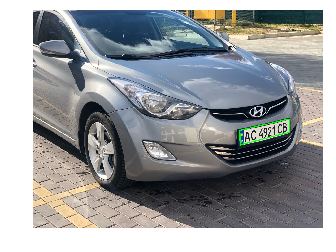

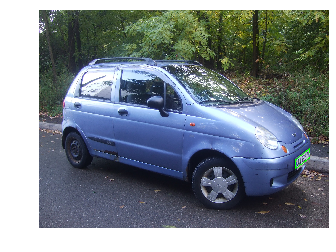

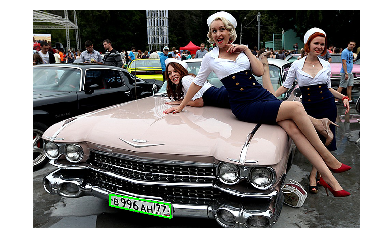

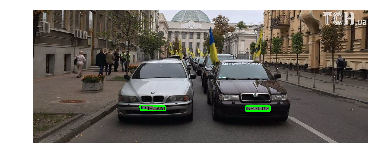

In [8]:
rootDir = "images/"
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        NP = nnet.detect([img])
        
        # Generate image mask.
        cv_img_masks = filters.cv_img_mask(NP) 
       
        res = []
        # Detect points.
        arrPoints = rectDetector.detect(cv_img_masks)
            
        filters.draw_box(img, arrPoints, (0, 255, 0), 3)
        plt.axis("off")
        plt.imshow(img)
        plt.show()